In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

import sys
sys.path.append("../") 

from src.utils.model import DistLayer

# Define the model class
class SimpleNN(nn.Module):
    def __init__(self, harmonic=False):
        super(SimpleNN, self).__init__()
        self.harmonic = harmonic
        if harmonic:
            self.fc1 = DistLayer(28 * 28, 10, n=28.)
        else:
            self.fc1 = nn.Linear(28 * 28, 10)
        nn.init.normal_(self.fc1.weight, mean=0, std=1/28.)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input
        x = self.fc1(x)
        if self.harmonic:
            prob = x/torch.sum(x, dim=1, keepdim=True)
            logits = (-1)*torch.log(prob)
            return logits
        return logits

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyperparameters
batch_size = 64
learning_rate = 0.001
epochs = 10

# Load MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor()
])

train_dataset = datasets.MNIST(root="./data", train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root="./data", train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Initialize the model, loss function, and optimizer
model = SimpleNN(harmonic=True).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for batch_idx, (data, targets) in enumerate(train_loader):
        data, targets = data.to(device), targets.to(device)

        # Forward pass
        outputs = model(data)
        loss = outputs[range(targets.size(0)), targets].mean()

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch + 1}/{epochs}], Loss: {running_loss / len(train_loader):.4f}")

# Evaluation
model.eval()
correct = 0
with torch.no_grad():
    for data, targets in test_loader:
        data, targets = data.to(device), targets.to(device)
        outputs = (-1)*model(data)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == targets).sum().item()

accuracy = correct / len(test_dataset) * 100
print(f"Test Accuracy: {accuracy:.2f}%")


Epoch [1/10], Loss: 0.6206
Epoch [2/10], Loss: 0.3462
Epoch [3/10], Loss: 0.3117
Epoch [4/10], Loss: 0.2954
Epoch [5/10], Loss: 0.2859
Epoch [6/10], Loss: 0.2788
Epoch [7/10], Loss: 0.2745
Epoch [8/10], Loss: 0.2708
Epoch [9/10], Loss: 0.2681
Epoch [10/10], Loss: 0.2653
Test Accuracy: 92.38%


1.9937347e-06
0.00080509606
-0.0005224761
-0.00020050778
-2.4398023e-05
8.7772576e-05
0.00020861505
1.0971041e-05
-0.026361346
0.0005562638


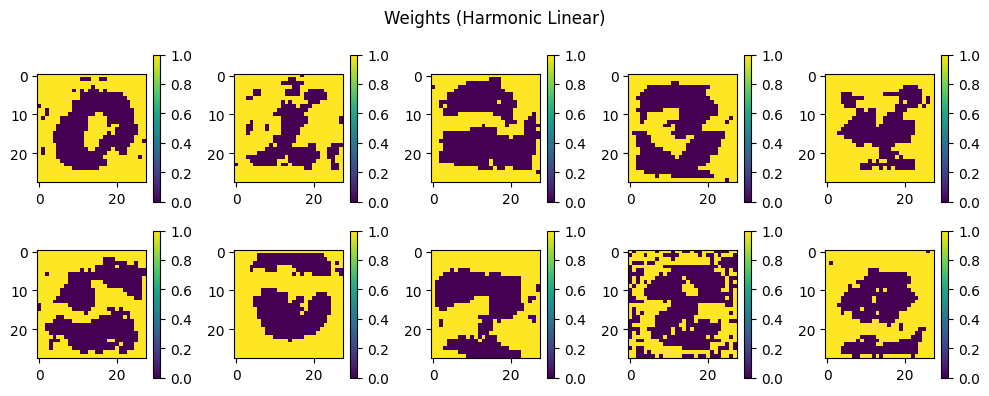

In [25]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(2, 5, figsize=(10, 4))
plt.suptitle("Weights (Harmonic Linear)")
for i in range(10):
    plt.subplot(2, 5, i + 1)
    weight = model.fc1.weight[i].reshape(28, 28).detach().numpy()
    print(weight[0].mean())
    weight = np.where(weight < 0.01, 1, 0)
    plt.imshow(weight)
    plt.colorbar()

plt.tight_layout()

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

import sys
sys.path.append("../") 

from src.utils.model import DistLayer

# Define the model class
class SimpleNN(nn.Module):
    def __init__(self, harmonic=False):
        super(SimpleNN, self).__init__()
        self.harmonic = harmonic
        if harmonic:
            self.fc1 = DistLayer(28 * 28, 10)
        else:
            self.fc1 = nn.Linear(28 * 28, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input
        x = self.fc1(x)
        if self.harmonic:
            prob = x/torch.sum(x, dim=1, keepdim=True)
            logits = (-1)*torch.log(prob)
            return logits
        return x

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyperparameters
batch_size = 64
learning_rate = 0.001
epochs = 10

# Load MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
])

train_dataset = datasets.MNIST(root="./data", train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root="./data", train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Initialize the model, loss function, and optimizer
model = SimpleNN(harmonic=False).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for batch_idx, (data, targets) in enumerate(train_loader):
        data, targets = data.to(device), targets.to(device)

        # Forward pass
        outputs = model(data)
        loss = criterion(outputs, targets)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch + 1}/{epochs}], Loss: {running_loss / len(train_loader):.4f}")

# Evaluation
model.eval()
correct = 0
with torch.no_grad():
    for data, targets in test_loader:
        data, targets = data.to(device), targets.to(device)
        outputs = model(data)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == targets).sum().item()

accuracy = correct / len(test_dataset) * 100
print(f"Test Accuracy: {accuracy:.2f}%")


Epoch [1/10], Loss: 0.5424
Epoch [2/10], Loss: 0.3229
Epoch [3/10], Loss: 0.2952
Epoch [4/10], Loss: 0.2819
Epoch [5/10], Loss: 0.2735
Epoch [6/10], Loss: 0.2677
Epoch [7/10], Loss: 0.2634
Epoch [8/10], Loss: 0.2602
Epoch [9/10], Loss: 0.2574
Epoch [10/10], Loss: 0.2550
Test Accuracy: 92.63%


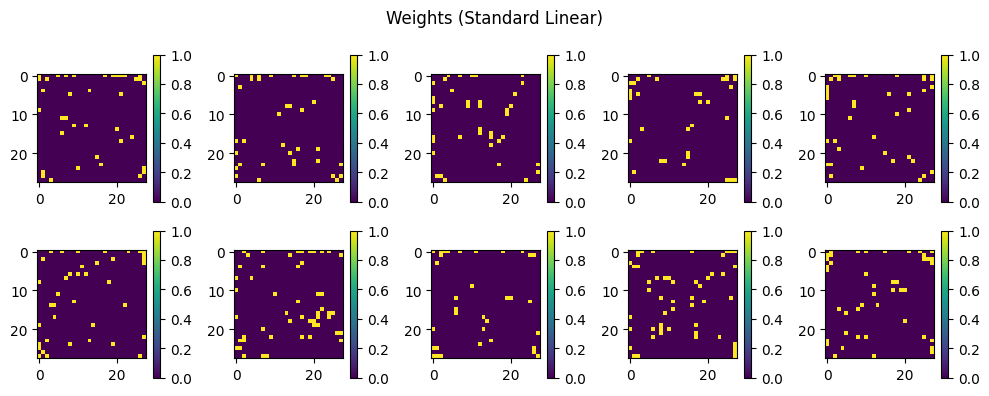

In [21]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(2, 5, figsize=(10, 4))
plt.suptitle("Weights (Standard Linear)")
for i in range(10):
    plt.subplot(2, 5, i + 1)
    weight = np.abs(model.fc1.weight[i].reshape(28, 28).detach().numpy())
    weight = np.where(weight < 0.01, 1, 0)
    plt.imshow(weight)
    plt.colorbar()

plt.tight_layout()